# Intermedaite charts
We will see following charts here
 - Bubble Chart
 - Bubble Map
 - Heatmap
 - Timeseries
 - Candlestick
 - SVG Paths and Shapes
 - Funner Chart

### Lets prepare the data

In [4]:
import pandas as pd
import plotly.offline as offline
import plotly.graph_objects as go

offline.init_notebook_mode(connected=True)

planets = pd.read_csv('datasets/planets.csv')
planets.head()

,planet,no_of_moons,distance_from_sun,period_of_revolution_around_sun,planet_diameter
0,Mercury,0,57.9,87.96,4879
1,Venus,0,108.2,224.68,12104
2,Earth,1,149.6,365.26,12756
3,Mars,2,227.9,686.98,6792
4,Jupiter,67,778.6,4332.70,142984


## Bubble Chart

Bubble chart is simply Scatter chart where another dimension is shown with size of marker

Lets say we want to show 4 dimensions on a plot
X -> Planet  
Y -> Distance from Sun  
Z -> Planet Diameter  
A -> No. of moons  
  
In normal scatter plot we can show 3rd dimension using color, So to show 4th dimension we can use Size of marker

In [21]:
trace0 = go.Scatter(
    x = planets.planet,
    y = planets.distance_from_sun,
    marker = go.scatter.Marker(
        size=planets.planet_diameter,
        sizeref=1000,
        color=planets.no_of_moons,
        colorscale='Rainbow',
        showscale=True
    ),
    mode='markers'
)

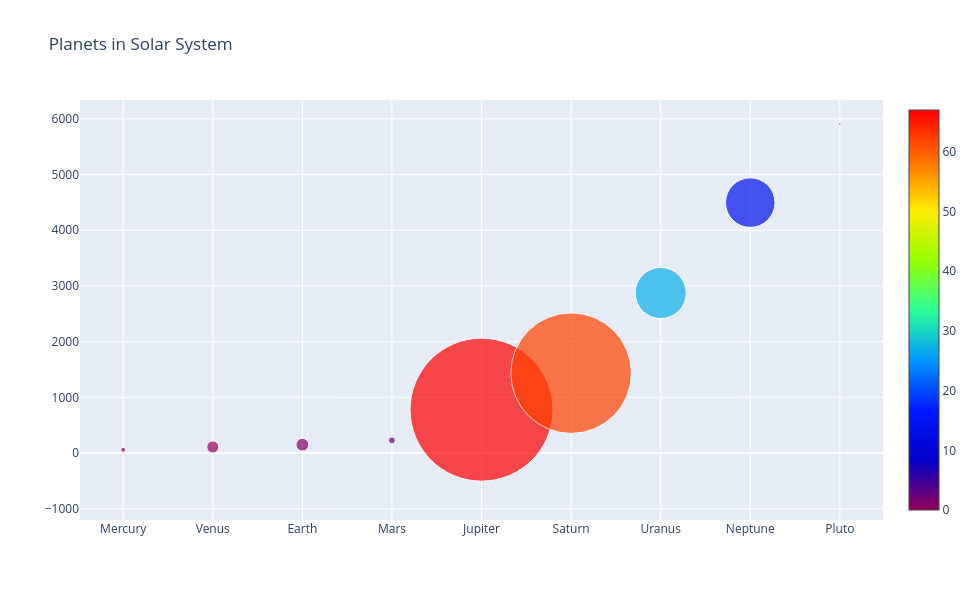

In [23]:
data = [trace0]
layout = go.Layout(height=600, width=900, title='Planets in Solar System')
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig)

## Bubble Map

Bubble map is a scatter plot shown on Geological map.  
We have meteorite data which has recorded meteorite landing observed in different areas. We can use bubble map to plot it map for better visualization

In [51]:
meteorite = pd.read_csv('datasets/meteorite-landings.csv')
meteorite.mass.isna().sum()

np.int64(131)

So there are about 131 missing values for mass. We can cleanse this data from dataset.

In [53]:
meteorite_clean = meteorite[meteorite.mass.notna()]
meteorite_clean.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


We have lattitude and longitudes in `reclat` and `reclong` fields. Lets plot the bubbles size dimension based on meteorite mass

If we plot this whole data, we won't be able to see anything. Lets reduce the dataset 

In [66]:
meteorite_clean.groupby(['year']).id.count().sort_values(ascending=False)

year
2003.0    3323
1979.0    3045
1998.0    2693
2006.0    2455
1988.0    2296
          ... 
1623.0       1
1628.0       1
1632.0       1
601.0        1
2101.0       1
Name: id, Length: 254, dtype: int64

We can see most observations aree in 2003, so lets plot 2003 data

In [68]:
meteorite_2003 = meteorite_clean[meteorite_clean.year == 2003]
meteorite_2003.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
137,Boumdeid (2003),57168,Valid,L6,190.0,Fell,2003.0,17.71067,-11.37150,"(17.710670, -11.371500)"
377,Hiroshima,11889,Valid,H5,414.0,Fell,2003.0,34.45000,132.38333,"(34.450000, 132.383330)"
378,Hoima,44714,Valid,H6,167.7,Fell,2003.0,1.34500,31.47278,"(1.345000, 31.472780)"
458,Kasauli,30740,Valid,H4,16820.0,Fell,2003.0,29.58333,77.58333,"(29.583330, 77.583330)"
465,Kendrapara,12276,Valid,H4-5,6669.2,Fell,2003.0,20.46250,86.70278,"(20.462500, 86.702780)"


In [74]:
trace0 = go.Scattergeo(
    lat=meteorite_2003.reclat,
    lon=meteorite_2003.reclong,
    mode='markers',
    text=meteorite_2003.name,
    marker=go.scattergeo.Marker(
        size=meteorite_2003.mass,
        sizeref=100,
        sizemode='area'
    )
)

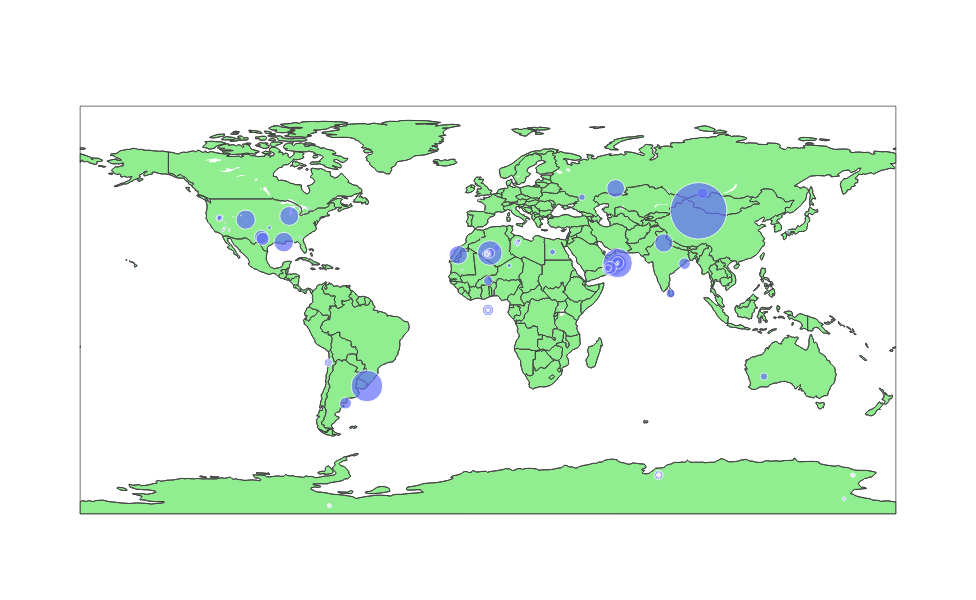

In [78]:
data = [trace0]
layout = go.Layout(
    height=600,
    width=900,
    geo=go.layout.Geo(
        showcountries=True, 
        showland=True, 
        landcolor='lightgreen'
    )
)
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig)

## Heatmaps

In [83]:
correlations = planets[['no_of_moons', 'distance_from_sun', 'period_of_revolution_around_sun', 'planet_diameter']].corr()
correlations

,no_of_moons,distance_from_sun,period_of_revolution_around_sun,planet_diameter
no_of_moons,1.000000,-0.011524,-0.118192,0.985365
distance_from_sun,-0.011524,1.000000,0.988813,-0.049386
period_of_revolution_around_sun,-0.118192,0.988813,1.000000,-0.156690
planet_diameter,0.985365,-0.049386,-0.156690,1.000000


In [84]:
trace0 = go.Heatmap(
    x = ['no_of_moons', 'distance_from_sun', 'period_of_revolution_around_sun', 'planet_diameter'],
    y = ['no_of_moons', 'distance_from_sun', 'period_of_revolution_around_sun', 'planet_diameter'],
    z = correlations
)


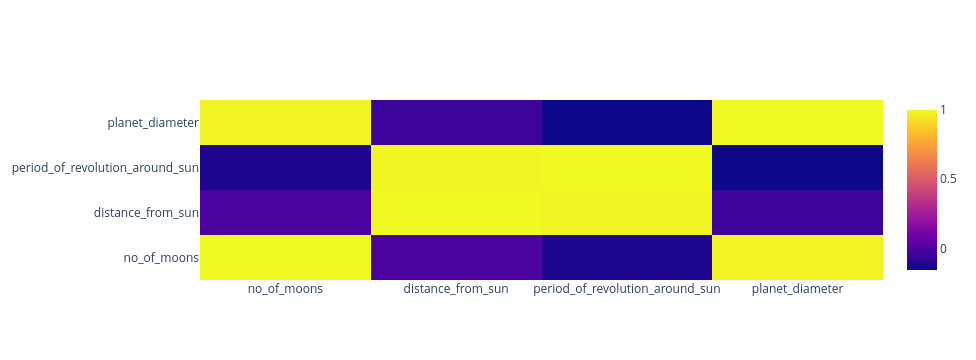

In [85]:
data = [trace0]
offline.iplot(data)